<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">SWDB, August 19-September 2, 2018</h1> 
<h3 align="center"></h3> 

<h1 align="center"> Dataset 3: Neuropixels Extracellular Electrophysiology</h1> 
<h3 align="center">Wednesday, August 22, 2018</h3> 
# <img src="../resources/EphysObservatory/neuropixels.png" height="250" width="250">  


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>This notebook will introduce you to Neuropixels spiking datasets. We will describe the basic structure of the data and then walk through basic analysis methods for accesssing, analyzing, and visualizing spike train data.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

** Datasets:**
* extracellular action potential recordings
* populations of single neurons in mouse brain
* passive visual stimulation in awake mouse
* battery of stimuli including drifting gratings and natural scenes

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

**Note:**

These pre-release datasets were collected during piloting for our new Ephys Brain Observatory. Pipeline data collection has just begun (August 2018) and production data will be released online in 2019.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>** Today's Agenda:**
<p>1. Overview of Neuropixels spiking datasets    
<p>2. Analysis and visualization of stimulus-evoked activity
<p>3. Correlations and cross-correlogram
<p>4. Waveform and spike pattern analysis for cell classification
<p>5. Project ideas

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

## Drive path and imports

In [1]:
#make sure your drive path is correct! 
# macOS/OS X
#drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/'

# Windows (a good guess)
# drive_path = 'e:/data/dynamic-brain-workshop/brain_observatory_cache'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache'

# AWS
# drive_path = '/data/dynamic-brain-workshop/brain_observatory_cache/'

#AIBS
drive_path = '/allen/aibs/informatics/swdb2018/visual_coding_neuropixels/2018_08_02'
manifest_path = '/allen/aibs/informatics/swdb2018/visual_coding_neuropixels/2018_08_02'

In [2]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# 1. Overview of datasets

** Brain areas:**
* Single-probe experiments: VISp
* Multi-probe experiments: VIPp + higher visual areas (VISam, VISpm, VISrl, VISl, VISal)

** Visual stimuli:**
* Passive visual stimulation using Brain Observatory - Visual Coding 1.1, 1.2 stimulus sets

In [3]:
#Provide path to manifest file
manifest_file = os.path.join(manifest_path,'ecephys_manifest.csv')

#Create a dataframe 
expt_info_df = pd.read_csv(manifest_file)

#Display information contained in the dataframe
expt_info_df

,nwb_filename,experiment_type,VISp,VISal,VISam,VISlm,VISpm,VISrl,locally_sparse_noise,gabor,drifting_gratings,static_gratings,natural_images,natural_movie_3,full_field_flashes
0,nwb_M14_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
1,nwb_M15_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
2,nwb_M16_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
3,nwb_M39_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
4,nwb_M51_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
5,mouse372584_probe_surf_bob.nwb,multi_probe,True,True,True,True,True,True,True,True,True,True,True,True,True
6,mouse387858.spikes.nwb,multi_probe,True,True,True,True,True,True,False,True,True,True,True,True,True
7,mouse384647.spikes.nwb,multi_probe,True,True,False,True,True,True,False,True,True,True,True,True,True
8,mouse388521.spikes.nwb,multi_probe,True,False,True,True,True,False,False,True,True,True,True,True,True


In [4]:
# Make new dataframe by selecting only single-probe experiments
single_probe_expt_info = expt_info_df[expt_info_df.experiment_type == 'single_probe']

print('Number of single-probe experiments: %s') %len(single_probe_expt_info)

#Display information about single probe expts
single_probe_expt_info

Number of single-probe experiments: 5


,nwb_filename,experiment_type,VISp,VISal,VISam,VISlm,VISpm,VISrl,locally_sparse_noise,gabor,drifting_gratings,static_gratings,natural_images,natural_movie_3,full_field_flashes
0,nwb_M14_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
1,nwb_M15_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
2,nwb_M16_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
3,nwb_M39_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
4,nwb_M51_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Task 1.1:** Make a dataframe for 'multi_probe' experiments. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Task 1.2:** How many multi-probe experiments?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Load dataset for one multi-probe experiment using NWB file adapter

* Datasets are stored as NWB1.0 files which is based on HDF5 file format
* To facilitate access to these files we have built a light-weight adapter object (NWB_adapter)
* The NWB_adapter provides easy access to unit spike times and stimulus presentation metadata

In [5]:
# Temporary 
#sys.path.append("/Users/shawn/Dropbox/PythonCode/ephys_swdb2018")
#from ephys_nwb_adapter import NWB_adapter
%load_ext autoreload
%autoreload 2

In [6]:
# Import NWB_adapter
from swdb_2018_neuropixels.ephys_nwb_adapter_debug import NWB_adapter

/home/rami/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
# Temporary - NWB_file names should come from manifest dataframe

#nwb_file = '/Users/shawn/Dropbox/DataSets/FHL 2018 TMP/mouse387858.spikes.nwb'
#nwb_file = os.path.join(drive_path,'mouse372584_probe_surf_bob.nwb')
nwb_file = os.path.join(drive_path,'mouse387858.spikes.nwb')
#nwb_file = os.path.join(drive_path,'mouse388521_draft.nwb')
#nwb_file = os.path.join(drive_path,'nwb_M15_actual_ds2.nwb')
#nwb_file = os.path.join(drive_path,'nwb_M51_actual_ds2.nwb')

In [8]:
data_set = NWB_adapter(nwb_file)

natural_scenes
drifting_gratings
flash_250ms
gabor_20_deg_250ms
natural_movie_1
natural_movie_3
static_gratings


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Task 1.3:** What are the attributes of the data_set object? Use either `dir` or tab-completion to find out what methods and info the `data_set` object has.

In [9]:
# data_set.  "tab completion"

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Task 1.4:** Which area has the most recorded units in this experiment? Hint: Look at number_cells attribute.

In [10]:
data_set.number_cells

{'VISal': 194,
 'VISam': 178,
 'VISl': 181,
 'VISp': 307,
 'VISpm': 286,
 'VISrl': 56}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
### Spike times

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
#### Look at spike_times in the data_set object. It is a dictionary with areas as keys

In [11]:
# Get all spike times from V1 units
v1_spikes = data_set.spike_times['VISp']

In [12]:
# v1_spikes is a dictionary with unit IDs as keys
v1_spikes.keys()[:5]

['216', '217', '214', '215', '212']

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Task 1.5:** How many units were recorded in V1 in this experiment?

In [13]:
len(v1_spikes.keys())

307

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
#### unit_list stores unit IDs for each area

In [14]:
# List of all units recorded in V1
v1_unit_list = data_set.unit_list['VISp']

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Task 1.6:** Print the unit ID for the first 20 units in v1_unit_list

In [15]:
print(v1_unit_list[:20]) # print unit ID for first 20 units

['1' '2' '3' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16' '17'
 '18' '19' '20' '21']


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
#### Get spike times from single unit in V1

In [16]:
spikes = v1_spikes[v1_unit_list[5]]
spikes[:20]

array([ 1.31423276,  2.23433284,  2.70113288,  3.36893294,  3.47529961,
        5.51523312,  7.3439666 ,  8.1714    , 11.24926693, 13.12006708,
       14.07063383, 14.91986723, 15.94376732, 16.74150072, 17.09313408,
       17.10163408, 17.56983412, 17.89743415, 17.94536749, 18.54510087])

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Task 1.7:** How many spikes were recorded from the first unit in v1_unit_list

In [17]:
len(spikes)

89614

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Exercise 1.1:** Plot a histogram showing spike count across the population of units recorded in V1. 

Text(0.5,0,u'number of spikes recorded')

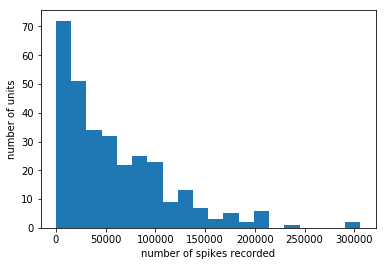

In [18]:
num_spikes = []
for k,v in v1_spikes.iteritems():
    num_spikes.append(len(v))
plt.hist(num_spikes,bins=20);
plt.ylabel('number of units')
plt.xlabel('number of spikes recorded')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Raster plot of spikes over session

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
#### Plot spike times from 1 neuron

Text(0.5,1,u'Spike train for 1 unit over first 5 minutes of experimental session')

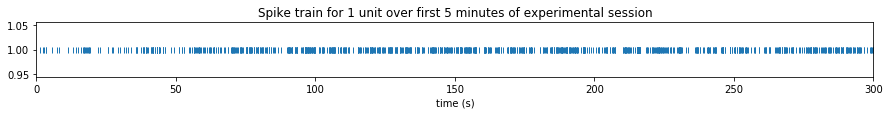

In [20]:
# Make raster plot of single unit spike train for first 300 seconds of recording

tst = 0
tend = 300

fig,ax = plt.subplots(1,1,figsize=(15,1))
ax.plot(spikes,np.ones_like(spikes),'|')
ax.set_xlim(tst,tend)

ax.set_xlabel('time (s)')
ax.set_title('Spike train for 1 unit over first 5 minutes of experimental session')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Exercise 1.2**  Plot spike train for last 300 seconds of experiment. Hint: Use the stim_blocks dataframe to determine the time of last stimulus block.

In [21]:
#data_set.stim_blocks.tail()

In [22]:
# end_time = data_set.stim_blocks.iloc[-1].end

# # Make raster plot of single unit spike train for first 600 seconds of recording
# fig,ax = plt.subplots(1,1,figsize=(15,1))
# ax.plot(spikes,np.ones_like(spikes),'|')
# ax.set_xlim(end_time-300,end_time)

# ax.set_xlabel('time (s)')
# ax.set_title('Spike train for 1 unit over first 10 minutes of experimental session')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
#### Plot spike times from 50 neurons

In [23]:
v1_unit_list[:50]

array(['1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51'], dtype='|S4')

Text(0.5,1,u'Spike train for 50 units over first 10 minutes of experimental session')

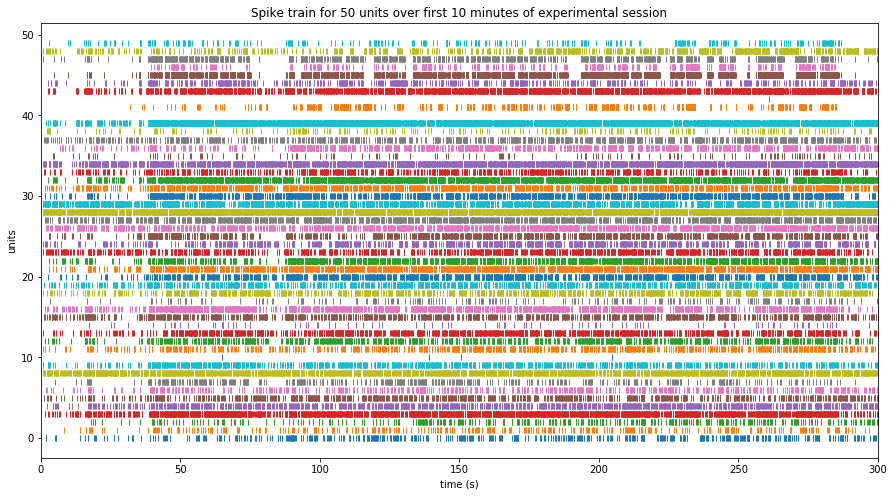

In [24]:
# Figure setup
fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,8)

# Loop through list of spike times from each unit and plot at different y-values
for i,unit in enumerate(v1_unit_list[:50]):
    spike_times = v1_spikes[unit]
    ax.plot(spike_times,i*np.ones_like(spike_times),'|')
plt.xlim(0,300)

ax.set_ylabel('units')
ax.set_xlabel('time (s)')
ax.set_title('Spike train for 50 units over first 10 minutes of experimental session')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Exercise 1.3:** Make series of rasters plots showing spiking activity from 20 units recordings in each of the 6 visual cortical areas.

Text(0,0.5,u'Units')

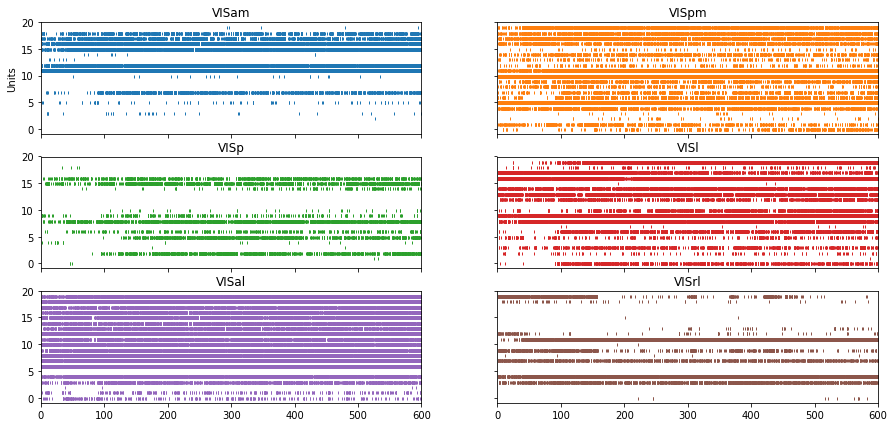

In [25]:
# Raster plot showing 20 units simultaneously recorded in each of 6 areas
areas = data_set.region_list

# Figure setup
fig,ax = plt.subplots(len(areas)/2,2,figsize=(15,7),sharex=True,sharey=True)
ax = ax.ravel()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Loop over areas
for idx,area in enumerate(areas):
    area_spikes = data_set.spike_times[area]
    unit_list = area_spikes.keys()
    
    # Plot spike times for 20 units
    for i,unit in enumerate(unit_list[:20]):
        spike_times = area_spikes[unit]
        ax[idx].plot(spike_times,i*np.ones_like(spike_times),'|',color=colors[idx],markersize=3)
        ax[idx].set_title(area)
        
plt.xlim(0,600)
ax[0].set_ylabel('Units')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# 2. Visualization and analysis of stimulus-evoked activity

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
### Stimulus blocks

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Task 2.1:** Look at the stim_blocks dataframe on the data_set object. When were the Natural Scenes shown in this experiment?

In [26]:
data_set.stim_blocks

,start,end,stim type
0,29.8169,89.8889,spontaneous
1,89.8889,1001.88,gabor_20_deg_250ms
2,1001.88,1290.87,spontaneous
3,1290.87,1589.37,flash_250ms
4,1591.12,5397.3,drifting_gratings
5,2221.65,4683.7,natural_movie_3
6,2852.17,8010.53,natural_movie_1
7,4683.7,5908.73,spontaneous
8,5398.3,9151.49,static_gratings
9,5908.73,8568.5,natural_scenes


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Task 1.4:** What are the keys of "stim_tables"?

In [27]:
data_set.stim_tables.keys()

['natural_movie_1',
 'natural_movie_3',
 'flash_250ms',
 'drifting_gratings',
 u'gabor_20_deg_250ms',
 u'spontaneous',
 'static_gratings',
 'natural_scenes']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
#### Make a plot showing stimulus blocks on experiment timeline

Text(0.5,0,u'Time in experiment (s)')

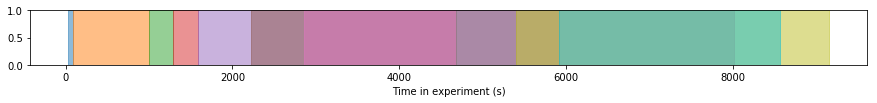

In [28]:
# Figure setup
fig,ax = plt.subplots(1,1,figsize=(15,1))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] ## TODO: Color convention??

# Plot stimulus blocks using axvspan method
for idx,row in data_set.stim_blocks.iterrows():
    ax.axvspan(row.start,row.end,color=colors[idx],alpha=0.5)
    
plt.xlabel('Time in experiment (s)')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Exercise 2.1: ** Plot stim_blocks for single-probe versus multi-probe experiment. Hint: Use manifest dataframe to identify single-probe experiment to load as 'data_set_2'

drifting_gratings
flash_250ms
flash_50ms
locally_sparse_noise
natural_scenes
natural_movie_1
natural_movie_3
natural_movie_Anton_1
natural_movie_Anton_2
natural_movie_Anton_3
static_gratings


/home/rami/Desktop/swdb_2018_neuropixels/swdb_2018_neuropixels/ephys_nwb_adapter_debug.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  stim_block_info_df.loc[0+len(stim_info.keys())] = [spont_stt,spont_end, 'spontaneous']


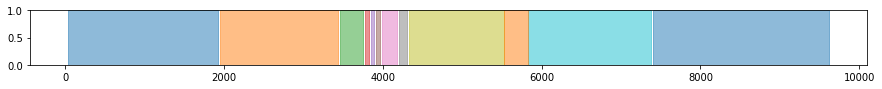

In [30]:
# Load single probe dataset
nwb_file_2 = os.path.join(drive_path,'nwb_M14_actual_ds2.nwb')
data_set_2 = NWB_adapter(nwb_file_2)

# Figure setup
fig,ax = plt.subplots(1,1,figsize=(15,1))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] ## TODO: Color convention??
colors = colors*2

# Plot
for idx,row in data_set_2.stim_blocks.iterrows():
    ax.axvspan(row.start,row.end,color=colors[idx],alpha=0.5)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Stimulus table

* Stimulus presentation information is found in the stimulus table
* The stim table for each stimulus type is accessed via stim_tables dictionary
* The keys of stim_tables are names of the stimulus sets

In [31]:
data_set.stim_tables.keys()

['natural_movie_1',
 'natural_movie_3',
 'flash_250ms',
 'drifting_gratings',
 u'gabor_20_deg_250ms',
 u'spontaneous',
 'static_gratings',
 'natural_scenes']

In [32]:
# Get the stim table for natural scenes
ns_table = data_set.stim_tables['natural_scenes']

In [33]:
ns_table.head()

,start,end,frame
0,5908.72592,5908.97449,34.0
1,5908.97449,5909.22469,6.0
2,5909.22469,5909.47521,28.0
3,5909.47521,5909.72637,109.0
4,5909.72637,5909.97549,105.0


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Task 2.2:** How many presentations of image 46?

In [34]:
print(len(ns_table[ns_table.frame==46]))

50


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Trial-wise raster plot

* We'll now use the stim table to identify when image #46 was presented
* From this we'll extract spikes around each stimulus presentation
* Finally we'll make a raster plot showing spikes on each trial

In [35]:
# Select trials from stim table for specific image_id
image_id = 46
img = ns_table[ns_table.frame==image_id]
img.head(3) # this is the stim table for image 46

,start,end,frame
326,5990.29287,5990.54277,46.0
540,6043.85469,6044.10378,46.0
579,6053.61356,6053.86333,46.0


In [36]:
# Example units from area AL
area = 'VISal'
units = ['166','254','283','226','100'] # Find example units from each experiment
all_spikes = data_set.spike_times[area]

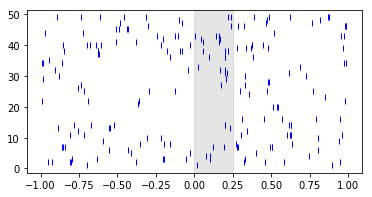

In [37]:
# Time before and after image presention
pre_time = 1.
post_time = 1.

# Get spike times from first unit in list
unit_spikes = all_spikes[units[0]]

# Make list containing spike train for each image presentation
all_trials = []
for i,start in enumerate(img.start):
    # Extract spikes around stimulus Start time
    spikes = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes <= start+post_time)]
    spikes = spikes - start
    all_trials.append(list(spikes))

# Figure setup
fig,ax = plt.subplots(1,1,figsize=(6,3))

# Make raster plot
for i,spikes in enumerate(all_trials):
    ax.plot(spikes,i*np.ones_like(spikes),'|',color='b')
    ax.invert_yaxis()

# Stimulus presentation window
stimulus_duration = img.end.values[0] - img.start.values[0]
ax.axvspan(0,stimulus_duration,color='gray',alpha=0.2);
    

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Exercise 2.2:** Write a function to plot raster for a given unit and image. Use your function to plot rasters for 6 example units for image 46. 
* Function call: image_raster(img, unit_spikes, ax)
    * img: stim table for 1 image
    * unit_spikes: spike times for 1 unit
    * ax: axis handle
    
    
* Example units: ['166','254','283','226','100','63']

In [38]:
def image_raster(img,unit_spikes,ax=[]):
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=(6,3))

    pre_time = .5
    post_time = .75

    all_trials = []
    # Get spike train for each trial
    for i,start in enumerate(img.start):
        spikes = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes < start+post_time)]
        spikes = spikes - start
        all_trials.append(list(spikes))

    # Plot each trial
    for i,spikes in enumerate(all_trials):
        ax.plot(spikes,i*np.ones_like(spikes),'|',color='b',markersize=4)
        ax.invert_yaxis()  
    ax.axvspan(0,0.25,color='gray',alpha=0.2);

    return ax

In [39]:
data_set.spike_times.keys()

['VISp', 'VISrl', 'VISal', 'VISam', 'VISpm', 'VISl']

(50, 0)

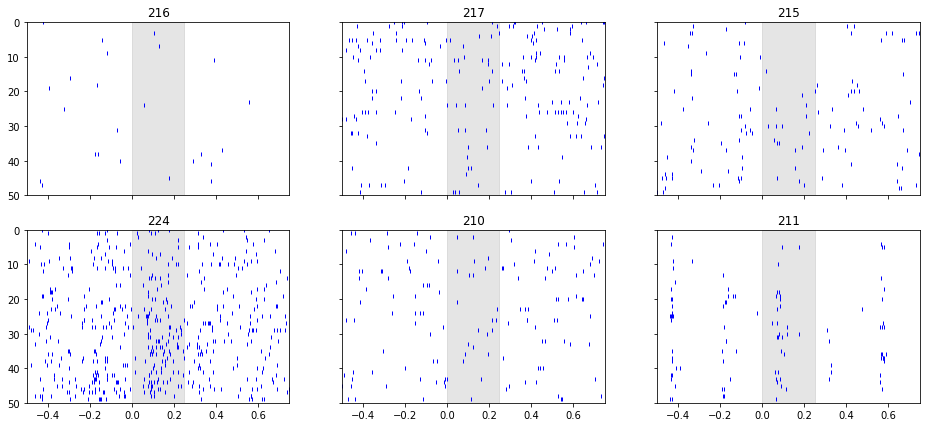

In [40]:
# Example units
area = 'VISal'
all_spikes = data_set.spike_times[area]
units = all_spikes.keys()[:6]
# units = ['166','254','283','226','100','63']

# Image ID
image_id = 46
img = ns_table[ns_table.frame==image_id]

# Figure setup
fig,ax = plt.subplots(2,3,figsize=(16,7),sharex=True,sharey=True)
ax = ax.ravel()

for i,unit in enumerate(units):
    unit_spikes = all_spikes[unit]
    image_raster(img,unit_spikes,ax[i])
    ax[i].set_title(unit)
    
ax[0].set_xlim(-0.5,0.75)
ax[0].set_ylim(50,0)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Peri-stimulus time histogram (PSTH)

Text about PSTH

In [41]:
# Example unit
unit = '100'

# Image ID
image_id = 46
img = ns_table[ns_table.frame==image_id]

# Get spike times for unit
unit_spikes = all_spikes[unit]

# Make a list with spike train for each stimulus presentation trial
all_trials = []
for i,start in enumerate(img.start):
    spikes = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes < start+post_time)]
    spikes = spikes - start
    all_trials.append(list(spikes))

In [42]:
# Make PSTH for each trial with 5 ms bins
bins = np.arange(-1,1.01,0.005)
all_counts = []
for trial in all_trials:
    c,edges = np.histogram(trial,bins)
    c = c/np.diff(bins[0:2])
    all_counts.append(c)
centers = edges[:-1] + np.diff(bins)/2

Text(0.5,0,u'Time (s)')

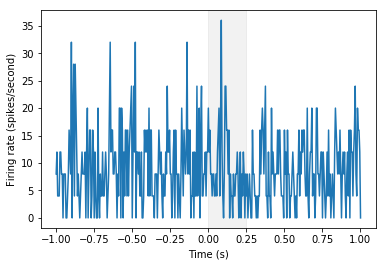

In [43]:
# Plot mean PSTH across trials
fig,ax = plt.subplots(1,1)
ax.plot(centers,np.mean(all_counts,axis=0))
ax.axvspan(0,0.25,color='gray',alpha=0.1)
ax.set_ylabel('Firing rate (spikes/second)')
ax.set_xlabel('Time (s)')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Exercise 2.3:** Write a function to plot PSTH for a given unit and image. Use your function to plot PSTHs for 6 example units for image 46. 
* Function call: image_psth(img, unit_spikes, ax)
    * img: stim table for 1 image
    * unit_spikes: spike times for 1 unit
    * ax: axis handle
    
    
* Example units: ['166','254','283','226','100','63']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
### Mean sweep response and tuning curves

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
#### Here we'll analyze responses to drifting gratings

In [44]:
# Get drifting gratings stim table
dg_stim = data_set.stim_tables['drifting_gratings']

# Select TF = 4.0
dg_stim = dg_stim[(dg_stim.temporal_frequency==4.0)]

# Get list of unique stimulus orientations
oris = sorted(dg_stim.orientation.unique())

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Task X.X **  TBD

In [45]:
# Example cells
area = 'VISal'
all_spikes = data_set.spike_times[area]
units = ['166','254','283','226','100','63']
unit_spikes = all_spikes[units[0]]

# Dictionary to store trial responses
trial_response = {}

# Window to compute firing rate
window = 0.25

# Dictionary to hold results
mean_sweep = {'Ori':[],'fr_mean':[],'fr_sem':[]}

# Loop over orientations
for ori in oris:
    tmp = dg_stim[dg_stim.orientation==ori]
    sc = []
    # Loop over trials/sweeps
    for i,start in enumerate(tmp.start):
        spikes = unit_spikes[(unit_spikes > start) & (unit_spikes <= start+window)]
        sc.append(len(spikes)/window)
    
    mean_sweep['Ori'].append(ori)
    mean_sweep['fr_mean'].append(np.mean(sc))
    mean_sweep['fr_sem'].append(np.std(sc)/np.sqrt(len(sc)))

Text(0.5,0,u'Orientation (degrees)')

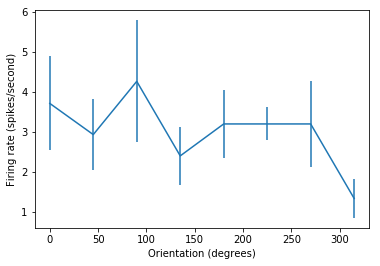

In [46]:
# plot tuning curve
plt.errorbar(x=mean_sweep['Ori'],y=mean_sweep['fr_mean'],yerr=mean_sweep['fr_sem'])
plt.ylabel('Firing rate (spikes/second)')
plt.xlabel('Orientation (degrees)')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Exercise 2.4** Compute tuning curve for static gratings. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
**Exercise 2.5 (Bonus)**  Plot rasters for each orientation of static and drifting gratings to compare temporal dynamics.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
# 3. Correlations and cross-correlogram

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
### Correlation between two neurons

In [47]:
# Get stimulus table 
dg_stim = data_set.stim_tables['drifting_gratings']

# Select TF = 4.0
dg_stim = dg_stim[(dg_stim.temporal_frequency==4.0)]

# Get orientation conditions
oris = sorted(dg_stim.orientation.unique())

# Get number of trials
n_trials = len(np.where(dg_stim.orientation.values==oris[0])[0])


In [48]:
# Visualize dataframe
dg_stim.loc[dg_stim.orientation.values==oris[0]]

,start,end,temporal_frequency,spatial_frequency,orientation
14,1633.15613,1635.15480,4.0,0.04,0.0
125,1966.43670,1968.43496,4.0,0.04,0.0
194,2173.60734,2175.60735,4.0,0.04,0.0
213,3221.48529,3223.48317,4.0,0.04,0.0
222,3248.50479,3250.50560,4.0,0.04,0.0
237,3293.54236,3295.54306,4.0,0.04,0.0
271,3395.62802,3397.62850,4.0,0.04,0.0
278,3416.64722,3418.64555,4.0,0.04,0.0
295,3467.68839,3469.68816,4.0,0.04,0.0
324,3554.76080,3556.76128,4.0,0.04,0.0


In [49]:
n_trials

14

In [50]:
# For given area:
area = 'VISal'
all_spikes = data_set.spike_times[area]

# Time window to compute firing rate
window = 0.25

# Example units
units = ['166','100']

# Define mean response matrix with dimension: neuron*ori*trial
response = np.zeros([len(units), len(oris), n_trials])
response = np.zeros([len(units), len(oris), 15])

# Loop over orientations
for idx_u, unit in enumerate(units):
    unit_spikes = all_spikes[unit]
    for idx_o, ori in enumerate(oris):
        tmp = dg_stim[dg_stim.orientation==ori]
        # Loop over trials/sweeps
        for idx, start in enumerate(tmp.start):
            spikes = unit_spikes[(unit_spikes > start) & (unit_spikes <= start+window)]
            # Calculate firing rate spike/sec
            FR = len(spikes)/window
            response[idx_u, idx_o, idx]=FR

In [51]:
# Check shape of output
response.shape

(2, 8, 15)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
### Signal correlation: correlation among tuning curves

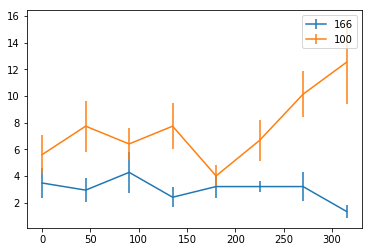

In [52]:
plt.figure()
tmp = response[0,:,:]
plt.errorbar(x=oris,y=tmp.mean(1),yerr=tmp.std(1)/np.sqrt(response.shape[2]), label=units[0])

tmp = response[1,:,:]
plt.errorbar(x=oris,y=tmp.mean(1),yerr=tmp.std(1)/np.sqrt(response.shape[2]), label=units[1])
plt.legend()

In [53]:
signal_corr = np.corrcoef(response.mean(2))[0,1]
print(signal_corr)

-0.6997780276521567


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Noise correlation: correlation across trials

Text(0,0.5,u'Mean FR: 100')

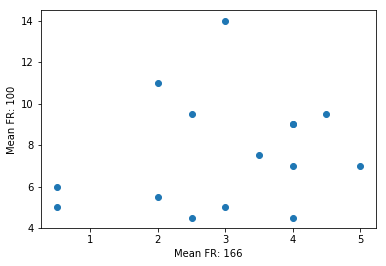

In [54]:
plt.figure()
ori=7
plt.scatter(response[0,:,:].mean(0), response[1,:,:].mean(0))
plt.xlabel('Mean FR: '+units[0])
plt.ylabel('Mean FR: '+units[1])

In [55]:
noise_corr = np.corrcoef(response.mean(1))[0,1]
print(noise_corr)

0.20379514991614484


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Exercise 3.1** Compute signal and noise correlation across all drifting grating stimulus parameters and compute average noise correlation.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Cross-correlogram: fast timescale correlations

TODO: Brief description of topic

In [56]:
# Cross-correlogram (CCG)

def ccg(train1, train2, binrange, binsize):
    """
    Computes a cross-correlogram for two spike trains.

    Parameters
    ----------
    train1 : numpy array
        Primary spike train. Cross-correlogram will be computed relative to spikes in this spike train.
    train2 : numpy array
        Secondary spike train.
    binrange : tuple or list of length=2
        Window over which to compute cross correlogram.
    binsize : float
        Size of bins in cross-correlogram

    """
    
    nbins = int((binrange[1]-binrange[0])/binsize)
    
    diffs = [extract_local(train2,t1,binrange) for t1 in train1]
        
    diffs = np.hstack(diffs)
    diffs = diffs[diffs!=0]

    hist, edges = np.histogram(diffs, bins=nbins, range=binrange)
        
    return edges[1:]-binsize/2, hist /float(len(train1))*100

def extract_local(train2,t1,binrange):
    """
    Returns events in `train2` which are within `binrange` of `t1`, aligned to `t1`

    Parameters
    ----------
    train2 : numpy array
    t1 : float
    binrange : tuple or list of length=2

    """

    start = np.searchsorted(train2,t1 + binrange[0])
    end = np.searchsorted(train2,t1 + binrange[1])

    return train2[start:end] - t1

In [57]:
# task
unit_list = data_set.unit_list['VISp']

In [58]:
spt_0 = v1_spikes[unit_list[9]]
spt_1 = v1_spikes[unit_list[12]]

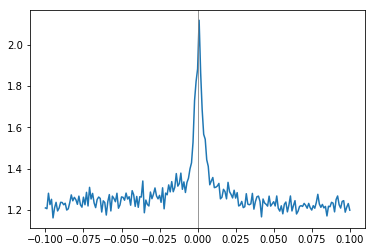

In [59]:
#Plot cross-correlogram between spike trains recorded from the two units

binsize = 0.001
ccg_win = [-0.1005,0.1005] #np.arange(-0.1005,0.1005,binsize)
ccg_centers,ccg_vals = ccg(spt_0,spt_1,ccg_win,binsize)
plt.figure()
plt.plot(ccg_centers,ccg_vals)
ax = plt.gca()
ax.axvline(ccg_centers[100],color='gray',linewidth = 0.8)
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Exercise 3.2 (Bonus): ** Write function to compute the "shuffle corrected CCG". 

In [60]:
# Solution

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# 4. Waveform and spike train analysis for cell classification

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
* Different cell types can show distinct extracellular action potential waveforms and firing patterns
* Here we will plot spike waveforms and inter-spike interval distributions for units in this experiment
* We will start by illustrating the classic RS and FS units division

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Spike waveforms: regular spiking (RS) and fast spiking (FS) units

In [61]:
# Get spikes waveforms using method on data_set
spike_waveforms = data_set.get_waveforms()

Text(0.5,0,u'ms')

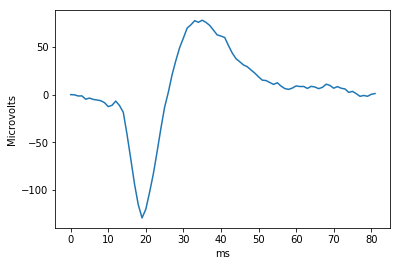

In [62]:
# Plot spike waveform for one unit
wv = spike_waveforms['probeB']['116']
plt.plot(wv)
plt.ylabel('Microvolts')
plt.xlabel('ms')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Exercise 4.1: ** Compute spike duration for all units in this experiment and plot histogram of values.

In [63]:
# Concatenate waveforms into matrix
wv = []
for k,w in spike_waveforms.iteritems():
    for kk,ww in w.iteritems():
        wv.append(ww)  
wv = np.array(wv)

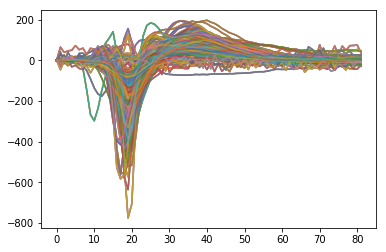

In [64]:
# Plot all waveforms in this data_set
fig,ax = plt.subplots(1,1,figsize=(6,4))
for w in wv:
    ax.plot(w,alpha=0.5)

In [65]:
# Compute trough to peak duration
duration = np.argmax(wv,axis=1) - np.argmin(wv,axis=1)
duration = 1/30000.*duration*1000 # Convert samples to ms

Text(0.5,0,u'Spike duration (ms)')

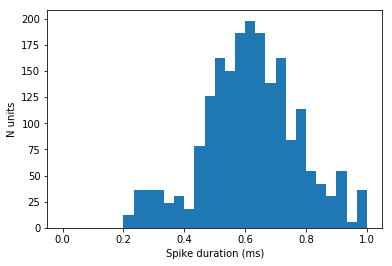

In [66]:
# Plot histogram of duration
plt.hist(duration,bins=30,range=(0,1));
plt.ylabel('N units')
plt.xlabel('Spike duration (ms)')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Exercise 4.2: ** Compute the average normalized waveform for RS and FS units and plot.

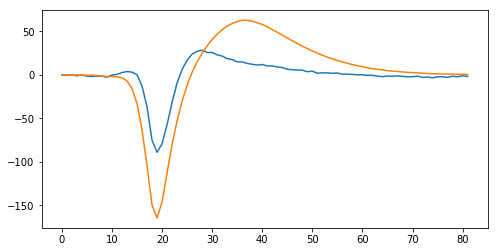

In [67]:
# Not yet complete. No waveform normalization yet. 
fs_idx = duration<0.4
rs_idx = duration>=0.4
fs = wv[fs_idx]
rs = wv[rs_idx]

fig,ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(fs.mean(axis=0))
ax.plot(rs.mean(axis=0))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Inter-spike interval (ISI) distributions and bursting
* Refractory period
* Bursting
* Oscillations

In [68]:
# Example units
area = 'VISal'
all_spikes = data_set.spike_times[area]
units = ['166','254','283','226','100','63']
unit_spikes = all_spikes['226']

Text(0.5,1,u'Spike train for 1 unit over first 10 minutes of experimental session')

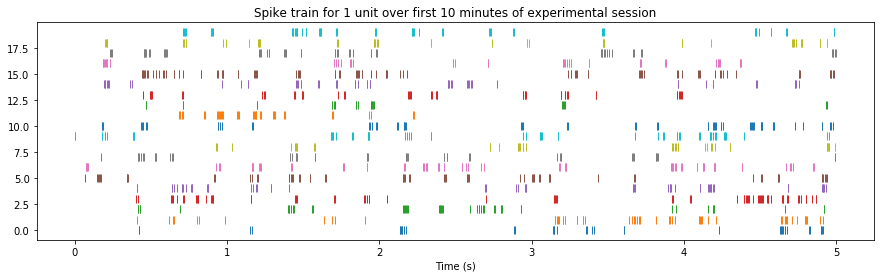

In [69]:
# Make raster plot of single unit spike train for first 600 seconds of recording
fig,ax = plt.subplots(1,1,figsize=(15,4))

t = (300,400)
window_length = 5 # 5 seconds
t = np.arange(t[0],t[1],window_length)

# Plot 5 second chunks from unit
for i,start in enumerate(t):
    spk = unit_spikes[(unit_spikes>start) & (unit_spikes<=start+window_length)]
    spk = spk - start
    ax.plot(spk,i*np.ones_like(spk),'|',markersize=8)

ax.set_xlabel('Time (s)')
ax.set_title('Spike train for 1 unit over first 10 minutes of experimental session')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Task 4.1:** Plot the inter-spike interval distribution with 1 ms bins. Show 2 graphs with different x-limits: (0, 20 ms) and (0, 200 ms)

In [70]:
# Compute inter-spike interval distribution for 1 unit
isi = np.diff(unit_spikes)*1000 # convert to ms
print(isi[:20])

[ 993.06668396 1759.33336397 2240.73337236  394.96667355  282.63333826
  227.66667063 1667.00002903  441.16667435  582.63334348  862.76668169
  412.30000718  320.50000558  223.86667057  226.90000395 2007.60003497
 2167.43337108  261.16667122  340.63333927 4040.5334037  1560.73336052]


Text(0.5,0,u'Inter-spike interval (ms)')

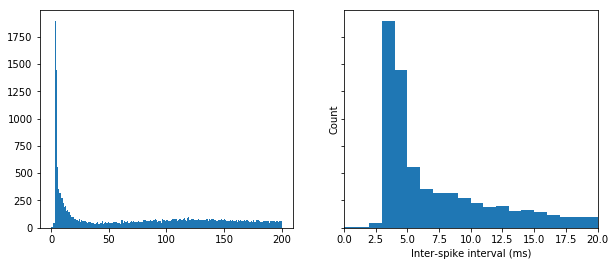

In [71]:
# Plot ISI distribution as histogram with 1 ms bins
fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
ax[0].hist(isi,bins=200,range=(0,200))
ax[1].hist(isi,bins=200,range=(0,200))
ax[1].set_xlim(0,20)
plt.ylabel('Count')
plt.xlabel('Inter-spike interval (ms)')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
** Exercise 4.3:**
1. Get spike times for 50 units with highest SNR and at least 3000 total spikes.
2. Plot ISI distribution for each unit
3. Do the ISI distributions vary between cells?

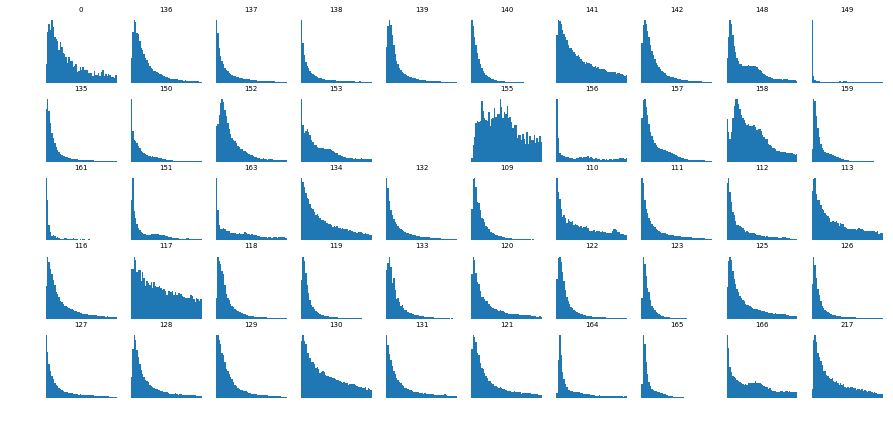

In [72]:
# Get spike times for 50 units with highest SNR and at least 3000 total spikes
unit_list = data_set.unit_list['VISal']
all_spikes = data_set.spike_times['VISal']
snr = np.ones_like(unit_list)
unit_list = unit_list[np.argsort(snr)][:50] # placeholder. Need SNR

# Figure setup
fig,ax = plt.subplots(5,10,figsize=(15,7),sharex=True)
ax = ax.ravel()

# Plot ISI distribution for each unit
for i,unit in enumerate(unit_list):
        unit_spikes = all_spikes[unit]
        if len(unit_spikes) > 3000:
            isi = np.diff(unit_spikes)
            ax[i].hist(isi,bins=50,range=(0,0.3))
            ax[i].set_title(str(unit_list[i]),fontsize=7)

plt.xlim(0,0.3)

for i in ax:
    i.axis('off')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


# Project ideas

** 1. Characterize visual stimulus coding by burst spikes**
    * Many cortical cells fire action potential in bursts (ISI < 10 ms).
    * Do burst spikes have similar tuning compared to all spikes?
    * Is bursting stimulus-dependent?
    
** 2. Cell classification using multi-channel waveform, spiking pattern, functional interactions**
    * Extracellular recordings can reveal RS and FS classes. 
    * High-density Neuropixels probes record single cells on multiple channels and this information can be useful for cell classification.
    * Can units be clustered based on spiking pattern ('bursting' vs 'non-bursting')?
    * Can spiking pattern, waveform, and functional interaction features be combined to improve unsupervised clustering (e.g. k-means) for identifying cell classes?
    
    
** 3. Explore spike count variability as a function of timescale **
    * Explore how spike count reliability and precision by examining variability on long (100s of ms) versus short (1-10 ms)timescales. 


** 4. Temporal dynamics of stimulus decodability**
    * How fast can stimuli be decoded from spiking populations? What is the timecourse of decodability in different areas and cortical layers?
    
    
** 5. Data visualization**
    * Visualize action potential backpropagation along the probe
    * Visualize spike patterns across shank of Neuropixels probe 
    * Visualize functional interaction network between layers and areas
    * Use dimensionality reduction to visualize spiking population dynamics in lower dimensional space

    
** 6. Compare image decoding using ephys vs ophys measurements**